### Analyzing the impact of risk factors on breast cancer incidence and mortality in Sub-Saharan Africa using machine learning

#### Introduction

Breast cancer is the most frequently diagnosed cancer and leading cause of cancer-related mortality in women globally. About 2.3 million new breast cancer cases and 685,000 deaths were recorded in 2020 [1]. Breast cancer incidence is increasing at different rates in various regions of the world. The highest incidence rates (per 100,000) were found in Australia/New Zealand (95.5), Western Europe (90.7), and North America (89.4), however, studies indicate that the mortality rate of breast cancer is higher in less developed regions. 

According to [2], women living in less developed regions of the world have 17% higher mortality rate compared with women in developed countries. The disparity in survival rates is an area of growing concern, particularly as the overall cancer burden in Sub-Saharan is dominated by breast cancer [3]. In Nigeria, a low-middle-income country, breast cancer is the most common malignancy among women, accounting for 22.7% of all new cancer cases. In 2018, an alarming total of 12,000 lives were lost to breast cancer, ranking Nigeria as the highest breast cancer mortality nation worldwide [4].

This findings necessitate an in-depth investigation into breast cancer data to uncover underlying risk factors driving the escalating rates of breast cancer incidence and mortality, with the ultimate goal of informing targeted interventions and control strategies to mitigate this trend. This project is intended to investigate the increasing cause of breast cancer incidence in Sub-Saharan Africa, particularly, Nigeria, and the pathogenic role of risk factors and how it can be managed.


#### Problem Statement

Breast cancer is rapidly emerging as a major global health concern, with sub-Saharan Africa shouldering a 
significant portion of the disease's impact, and a staggering projection of over 3 million breast cancer cases by 2040.
This rising cases warrant a comprehensive analysis of breast cancer data to pinpoint key risk factors contributing to the
rising burden of breast cancer, enabling the development of evidence-based control measures and preventive strategies to reduce breast cancer incidence and mortality rates


#### Methodology

The methodolody for this project was designed to uncover insights on the role of risk factors as initiators of breast cancer carcinogenesis. The step-wise processes adopted for this project include: Data import, data exploration, data cleaning, exploratory data analysis (descriptive and inferential statistics), data preprocessing (encoding categorical variables, correlation assessment), dataset development for training and testing model, feature scaling, model prediction with classifier algorithms

The project objective focused on the binary prediction of the development of breast cancer factoring 9 features in the breast cancer dataset. To predict breast cancer incidence, I employed 7 different methods from different machine learning algorithms. The classifiers include one linear statistical method (Logistic Regression), two tree-based methods (Random Forests and Decision Tree), one Support Vector Machines (linear), one instance-based learning model (k-Nearest Neighbors), and two ensemble classifier method (XGBoost and Gradient Boosting)

#### Data Source

The dataset used for this project is publicly available on Kaggle at: https://data.world/health/breast-cancer-wisconsin. For the intended purpose of this project, I must admit this dataset is not the most suited to identifying the role of risk factors in the increasing burden of breast cancer incidence in Sub-Saharan Africa (reason is elaborately discussed in the recommendation section later). However, the data is still very useful in understanding the role of breast cancer risk factors and their underlying mechanisms that promote breast cancer carcinogenesis in women

#### Data Analysis


In [7]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
# Import dataset
bc_data = pd.read_csv("breast-cancer-dataset.csv")
if bc_data is not None:      
    print("Breast cancer dataset read successfully")
else:
    print("learn how to use pandas")


Breast cancer dataset read successfully


In [9]:
# View breast cancer dataset in pandas dataframe
bc_data.head(10)

S/N  Year  Age  Menopause Tumor Size (cm) Inv-Nodes Breast Metastasis  \
0    1  2019   40          1               2         0  Right          0   
1    2  2019   39          1               2         0   Left          0   
2    3  2019   45          0               4         0   Left          0   
3    4  2019   26          1               3         0   Left          0   
4    5  2019   21          1               1         0  Right          0   
5    6  2019   50          0               5         1  Right          1   
6    7  2019   58          0               6         1  Right          1   
7    8  2019   21          1               3         0   Left          0   
8    9  2019   35          1               4         0   Left          0   
9   10  2019   42          1               2         0  Right          0   

  Breast Quadrant History Diagnosis Result  
0     Upper inner       0           Benign  
1     Upper outer       0           Benign  
2     Lower outer       0           Benign  
3     Lower inner       1           Benign  
4     Upper outer       1           Benign  
5     Lower outer       0        Malignant  
6     Upper outer       0        Malignant  
7     Upper inner       0           Benign  
8     Upper outer       0           Benign  
9     Lower outer       1           Benign

In [10]:
# View shape of dataframe
print("Shape of the data", bc_data.shape)

Shape of the data (213, 11)


#### Data Exploration

In [13]:
print("Information about the data:-")
bc_data.info()

Information about the data:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               213 non-null    int64 
 1   Year              213 non-null    object
 2   Age               213 non-null    int64 
 3   Menopause         213 non-null    int64 
 4   Tumor Size (cm)   213 non-null    object
 5   Inv-Nodes         213 non-null    object
 6   Breast            213 non-null    object
 7   Metastasis        213 non-null    object
 8   Breast Quadrant   213 non-null    object
 9   History           213 non-null    object
 10  Diagnosis Result  213 non-null    object
dtypes: int64(3), object(8)
memory usage: 18.4+ KB


In [14]:
# Statistical overview 
print("Statistical information about the data:-")
bc_data.describe().T

Statistical information about the data:-


count        mean        std   min   25%    50%    75%    max
S/N        213.0  107.000000  61.631972   1.0  54.0  107.0  160.0  213.0
Age        213.0   39.784038  14.096712  13.0  30.0   40.0   49.0   77.0
Menopause  213.0    0.666667   0.472515   0.0   0.0    1.0    1.0    1.0

In [15]:
# Dataset overview
print("No. of null values:-")
bc_data.isnull().sum()


No. of null values:-


S/N                 0
Year                0
Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              0
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    0
dtype: int64

In [16]:
print("List of columns in dataset:")
bc_data.columns


List of columns in dataset:


Index(['S/N', 'Year', 'Age', 'Menopause', 'Tumor Size (cm)', 'Inv-Nodes',
       'Breast', 'Metastasis', 'Breast Quadrant', 'History',
       'Diagnosis Result'],
      dtype='object')

##### Features information
- S/N: identifies all rows in dataset with a unique number
- Year: indicates the year the patient was diagnosed with breast cancer
- Age: indicates the patients age at the time of breast cancer diagnosis
- Menopause: represents the patient menopausal status at the time of breast cancer diagnosis

- Tumor Size (cm): indicates the size of patient tumor in centimeters at the time of breast cancer diagnosis

- Inv-Nodes: indicates the count of lymph nodes that contain metastatic breast cancer visible on histological examination at time of diagnosis

- Breast: indicates the side of the breast the cancer was diagnosed (left or right)
- Metastasis: indicates whether the cancer has spread beyond the original site of development 
- Breast Quadrant: indicates the location of the tumor within the breast, divided into quadrants
- History: indicates the patient history of breast cancer, entailing previous diagnoses and overall relevant medical conditions
- Diagnosis Result: indicates the result of the breast cancer diagnosis


In [18]:
# Identification of unique values in columns
bc_data['History'].unique()

array(['0', '1', '#'], dtype=object)

In [19]:
bc_data['Breast'].unique()

array(['Right', 'Left', '#'], dtype=object)

In [20]:
bc_data['Metastasis'].unique()

array(['0', '1', '#'], dtype=object)

In [21]:
bc_data['Year'].unique()

array(['2019', '#', '2020'], dtype=object)

In [22]:
bc_data['Menopause'].unique()

array([1, 0], dtype=int64)

In [23]:
bc_data['Tumor Size (cm)'].unique()

array(['2', '4', '3', '1', '5', '6', '7', '10', '8', '9', '#', '14', '12'],
      dtype=object)

In [24]:
bc_data['Inv-Nodes'].unique()

array(['0', '1', '#', '3'], dtype=object)

In [25]:
bc_data['Breast Quadrant'].unique()

array(['Upper inner', 'Upper outer', 'Lower outer', 'Lower inner', '#',
       'Upper outer '], dtype=object)

In [26]:
bc_data['Age'].unique()

array([40, 39, 45, 26, 21, 50, 58, 35, 42, 41, 43, 30, 33, 38, 60, 47, 57,
       34, 31, 36, 56, 48, 61, 20, 37, 27, 25, 17, 23, 59, 67, 46, 24, 49,
       53, 28, 68, 64, 18, 14, 15, 54, 71, 55, 22, 65, 19, 52, 51, 44, 63,
       29, 32, 62, 69, 13, 16, 77], dtype=int64)

In [27]:
# Identification of inconsistent values
bc_data[bc_data['History'] == '#']

S/N  Year  Age  Menopause Tumor Size (cm) Inv-Nodes Breast Metastasis  \
40   41     #   34          1               #         #      #          #   
67   68  2019   40          1               1         0   Left          0   

   Breast Quadrant History Diagnosis Result  
40               #       #        Malignant  
67     Lower outer       #           Benign

In [28]:
bc_data[bc_data['Breast Quadrant'] == '#']     # Inconsistent value identified in another column

S/N  Year  Age  Menopause Tumor Size (cm) Inv-Nodes Breast Metastasis  \
30   31  2019   56          0               9         1   Left          1   
40   41     #   34          1               #         #      #          #   

   Breast Quadrant History Diagnosis Result  
30               #       0        Malignant  
40               #       #        Malignant

##### Data exploration summary:

- There is an incorrect entry of value (#) in all columns except age and menopause column
- Row 40 appears to have a lot of invalid entries (#) across multiple columns
- Columns (Year, Tumor Size (cm), Inv-Nodes, Metastasis, History) have their datatypes as object inplace of integer

#### Data cleaning 

In [32]:
# Original dataset was cloned to store and preserve data integrity, 
# while cloned dataset was cleaned and adopted for further EDA
BrCa_data = bc_data.copy()

In [33]:
# Data cleaning process

# Remove duplicate values
# Selecting duplicate rows in dataset based on all columns
print("Total number of duplicates in dataset:- ")
bc_data[bc_data.duplicated()].sum().sum()


Total number of duplicates in dataset:- 


0

In [34]:
# Remove irrelevant data

# Define the unwanted value
unwanted_value = '#'

# Replace the unwanted value in multiple columns
bc_data.replace(unwanted_value, pd.NA, inplace=True)


In [35]:
# Check for missing values

print("No. of missing values in dataset:-")
bc_data.isnull().sum().sum()

No. of missing values in dataset:-


14

In [36]:
# List of columns with missing values
bc_data.isnull().sum()

S/N                 0
Year                1
Age                 0
Menopause           0
Tumor Size (cm)     1
Inv-Nodes           1
Breast              6
Metastasis          1
Breast Quadrant     2
History             2
Diagnosis Result    0
dtype: int64

In [37]:
# Fixing missing values

# Define the index of the row to be removed
index_to_remove = 40

# Remove the row with the specified index
bc_data = bc_data.drop(index_to_remove)

In [38]:
# Check for remaining columns with missing values
bc_data.isnull().sum()

S/N                 0
Year                0
Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              5
Metastasis          0
Breast Quadrant     1
History             1
Diagnosis Result    0
dtype: int64

In [39]:
# Breast, Breast Quadrant and History columns have 5, 1 and 1 missing value(s) respectively

In [40]:
# Identification of rows with missing values in dataframe
bc_data[bc_data.isnull().any(axis=1)]


S/N  Year  Age  Menopause Tumor Size (cm) Inv-Nodes Breast Metastasis  \
30    31  2019   56          0               9         1   Left          1   
47    48  2019   25          1               5         0   <NA>          0   
67    68  2019   40          1               1         0   Left          0   
143  144  2020   29          1               2         0   <NA>          0   
164  165  2020   38          1               2         0   <NA>          0   
166  167  2020   62          0               3         1   <NA>          1   
178  179  2020   49          1               4         0   <NA>          0   

    Breast Quadrant History Diagnosis Result  
30             <NA>       0        Malignant  
47      Upper outer       0        Malignant  
67      Lower outer    <NA>           Benign  
143     Lower inner       1           Benign  
164     Upper outer       1           Benign  
166     Upper inner       1        Malignant  
178     Lower outer       0           Benign

In [41]:
# For Breast column missing values
bc_data['Breast'].value_counts()

# The position of breast cancer (either left or right) is not the primary focus of this project, rather the incidence of breast cancer
# Hence, for the 5 missing values in Breast column, the highest count (either left or right) will be adopted to fill the missing values

Breast
Left     107
Right    100
Name: count, dtype: int64

In [42]:
# Replace null values in Breast column with specific value 'Left'
bc_data['Breast'] = bc_data['Breast'].fillna('Left')


In [43]:
# Confirmation of fixed missing value(s) of Breast column in dataframe
bc_data[bc_data.isnull().any(axis=1)]


S/N  Year  Age  Menopause Tumor Size (cm) Inv-Nodes Breast Metastasis  \
30   31  2019   56          0               9         1   Left          1   
67   68  2019   40          1               1         0   Left          0   

   Breast Quadrant History Diagnosis Result  
30            <NA>       0        Malignant  
67     Lower outer    <NA>           Benign

In [44]:
# For Breast Quadrant column missing values

# According to research [5], the most common site for the occurrence of breast cancer is the upper outer quadrant
# Hence, I considered filling the missing value(s) in the Breast Quadrant column by 'Upper outer' in place of deleting the entire row

In [45]:
# Replace null values in Breast Quadrant column with specific value 'Upper outer'
bc_data['Breast Quadrant'] = bc_data['Breast Quadrant'].fillna('Upper outer')


In [46]:
# Confirmation of fixed missing value(s) of Breast Quadrant column in dataframe
bc_data[bc_data.isnull().any(axis=1)]


S/N  Year  Age  Menopause Tumor Size (cm) Inv-Nodes Breast Metastasis  \
67   68  2019   40          1               1         0   Left          0   

   Breast Quadrant History Diagnosis Result  
67     Lower outer    <NA>           Benign

In [47]:
# For History column missing values

# The history column is a key risk factor with significant implication for breast cancer incidence, and missing value here should not be self generated
# Hence, the row will be deleted to avoid inputting incorrect data

# Define row to be deleted with index
delete_history_row = 67

# Remove the row with the specified index
bc_data = bc_data.drop(delete_history_row)


In [48]:
# Confirmation of fixed missing value(s) in dataframe
print("No. of missing values in dataset:-")
bc_data.isnull().sum().sum()


No. of missing values in dataset:-


0

In [49]:
# Remove irrelevant column (S/N provides no meaningful statistical value to this analysis )
bc_data = bc_data.drop("S/N", axis=1)

In [50]:
# Convert column with object datatypes to integers 
bc_data[['Year', 'Tumor Size (cm)', 'Inv-Nodes', 'Metastasis', 'History']] = bc_data[['Year', 'Tumor Size (cm)', 'Inv-Nodes', 'Metastasis', 'History']].astype(int)

# View datatypes of columns
bc_data.dtypes

Year                 int32
Age                  int64
Menopause            int64
Tumor Size (cm)      int32
Inv-Nodes            int32
Breast              object
Metastasis           int32
Breast Quadrant     object
History              int32
Diagnosis Result    object
dtype: object

In [51]:
# Ages < 40 in menopause column indicate menopause,
# and ages > 50 indicate premenopause which is scientifically not possible  

# Standardize values in menopause column
bc_data['Menopause'] = bc_data['Menopause'].replace({0:1, 1:0})

In [52]:
# Dataframe overview of cleaned data
bc_data.head()


Year  Age  Menopause  Tumor Size (cm)  Inv-Nodes Breast  Metastasis  \
0  2019   40          0                2          0  Right           0   
1  2019   39          0                2          0   Left           0   
2  2019   45          1                4          0   Left           0   
3  2019   26          0                3          0   Left           0   
4  2019   21          0                1          0  Right           0   

  Breast Quadrant  History Diagnosis Result  
0     Upper inner        0           Benign  
1     Upper outer        0           Benign  
2     Lower outer        0           Benign  
3     Lower inner        1           Benign  
4     Upper outer        1           Benign

##### Data cleaning summary:

- Dataset had 213 rows and 11 columns
- No duplicate values found in dataset
- 2 rows and 1 column were deleted
- 14 irrelevant values were identified across multiple columns in the dataset and corrected
- Missing values were rectified
- Wrong datatypes corrected as appropriate

#### Exploratory Data analysis (EDA)

To understand the role of risk factors in breast cancer incidence, we need to critically examine the relationship between the key risk factor features (Age, Menopause and History) and the Diagnosis Result. This EDA is designed to explore the distribution of the dataset with focus on observing the data trend and patterns of key risk factors, highlighting the implication of these risk factors and their contributory role in the event of breast cancer incidence through visualization report and statistical assessment


In [56]:
# Relationship between Age, Menopause, History with Diagnosis Result for EDA

# Mean Age
mean_age = bc_data['Age'].mean()
print(f"The mean age of women screened for breast cancer from this data is {mean_age} years")


The mean age of women screened for breast cancer from this data is 39.81042654028436 years


In [57]:
# EDA on Age
print("Statistical information on age of women who underwent breast cancer examination:-")
bc_data['Age'].describe()


Statistical information on age of women who underwent breast cancer examination:-


count    211.000000
mean      39.810427
std       14.158023
min       13.000000
25%       30.000000
50%       40.000000
75%       49.500000
max       77.000000
Name: Age, dtype: float64

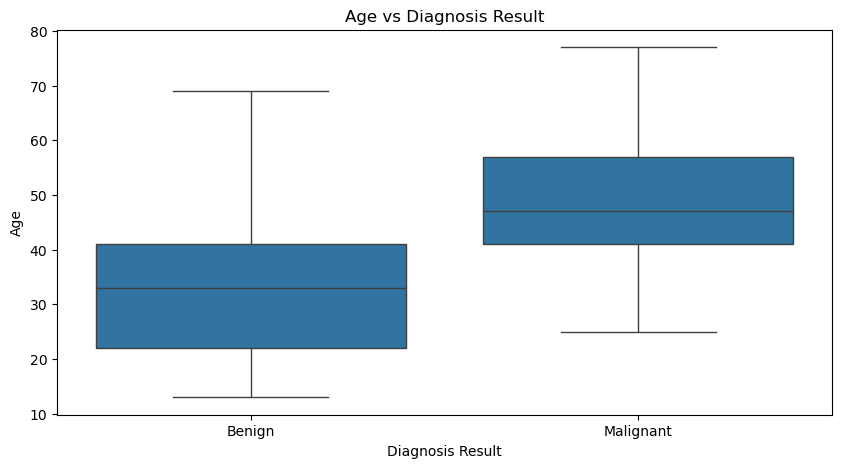

In [58]:
# Visualization analysis of Diagnosis Result and breast cancer risk factors

# Data visualization to show relationship between the Diagnosis Result and Age
plt.figure(figsize=(10, 5))
sns.boxplot(x='Diagnosis Result', y='Age', data=bc_data)
plt.title('Age vs Diagnosis Result')
plt.show()


##### Visualization report summary between Age and Diagnosis Result
The boxplot visualization indicates benign cases of breast cancer was prevalent in women with a lower age range compared to malignant cases, suggesting a age-related disparity in the breast cancer diagnostic outcome

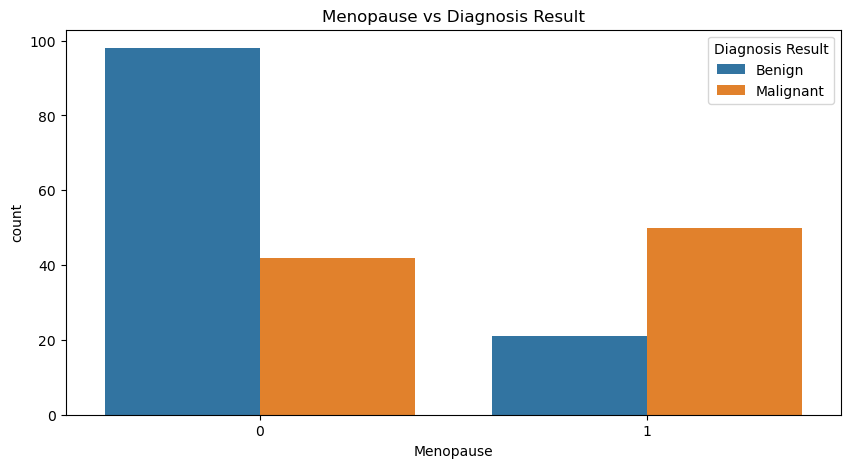

In [60]:
# Data visualization to show relationship between the Diagnosis Result and risk factor Menopause
plt.figure(figsize=(10, 5))
sns.countplot(x='Menopause', hue='Diagnosis Result', data=bc_data)
plt.title('Menopause vs Diagnosis Result')
plt.show()


##### Visualization report summary between Menopause and the Diagnosis Result
The countplot visualization reveals premenopausal women had remarkably higher observation of benign cases compared to malignant cases as opposed to postmenopausal women who had significantly higher rate of breast cancer malignancy compared with benign cases

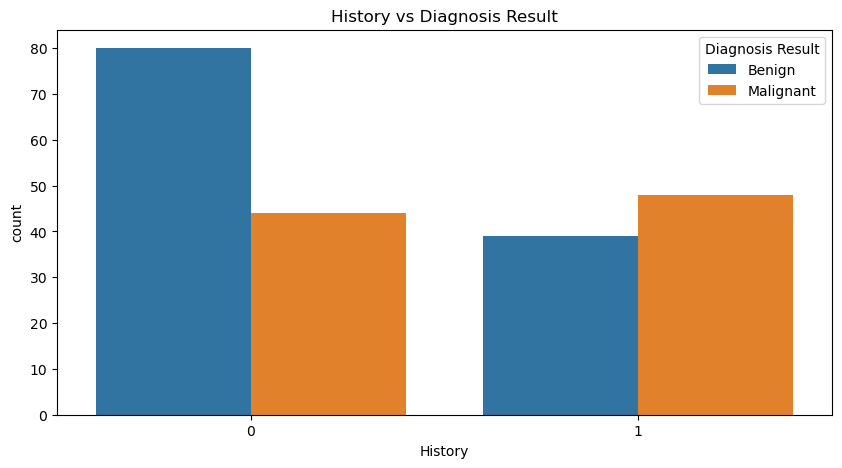

In [62]:
# Data visualization to show relationship between the Diagnosis Result and risk factor History
plt.figure(figsize=(10, 5))
sns.countplot(x='History', hue='Diagnosis Result', data=bc_data)
plt.title('History vs Diagnosis Result')
plt.show()


##### Visualization report summary between History and Diagnosis Result
The countplot visualization show that women with no history of breast cancer incidence had significantly higher proportion of benign cases compared to malignant cases. In contrast, women who had history of breast cancer incidence revealed a considerablely higher level of malignant cases compared to benign cases  

#### Data Pre-processing

In [66]:
# Encoding categorical dependent variable
bc_data["Diagnosis Result"].unique()
# array(['M', 'B'])

bc_data["Diagnosis Result"].value_counts()

# Encoding independent variable using Mapping 
bc_data["Diagnosis Result"] = bc_data["Diagnosis Result"].map({'Malignant':1, 'Benign':0})


In [67]:
# Create copy of dataframe 
bc_data_corr = bc_data
bc_data_corr

Year  Age  Menopause  Tumor Size (cm)  Inv-Nodes Breast  Metastasis  \
0    2019   40          0                2          0  Right           0   
1    2019   39          0                2          0   Left           0   
2    2019   45          1                4          0   Left           0   
3    2019   26          0                3          0   Left           0   
4    2019   21          0                1          0  Right           0   
..    ...  ...        ...              ...        ...    ...         ...   
208  2020   49          0                6          3  Right           1   
209  2020   28          0                3          0   Left           0   
210  2020   22          0                1          0   Left           0   
211  2020   19          0                1          0   Left           0   
212  2020   50          1                4          0  Right           0   

    Breast Quadrant  History  Diagnosis Result  
0       Upper inner        0                 0  
1       Upper outer        0                 0  
2       Lower outer        0                 0  
3       Lower inner        1                 0  
4       Upper outer        1                 0  
..              ...      ...               ...  
208     Lower inner        1                 1  
209     Upper inner        0                 0  
210     Upper outer        1                 0  
211     Lower inner        1                 0  
212     Lower outer        1                 0  

[211 rows x 10 columns]

In [68]:
# Create function to convert breast column categorical variable into numerical value
def breast_position(Breast):
        if Breast == 'Right':
            return 1
        else:
            return 0
            
bc_data_corr['Breast'] = bc_data_corr['Breast'].apply(breast_position)


In [69]:
# View dataframe
bc_data_corr

Year  Age  Menopause  Tumor Size (cm)  Inv-Nodes  Breast  Metastasis  \
0    2019   40          0                2          0       1           0   
1    2019   39          0                2          0       0           0   
2    2019   45          1                4          0       0           0   
3    2019   26          0                3          0       0           0   
4    2019   21          0                1          0       1           0   
..    ...  ...        ...              ...        ...     ...         ...   
208  2020   49          0                6          3       1           1   
209  2020   28          0                3          0       0           0   
210  2020   22          0                1          0       0           0   
211  2020   19          0                1          0       0           0   
212  2020   50          1                4          0       1           0   

    Breast Quadrant  History  Diagnosis Result  
0       Upper inner        0                 0  
1       Upper outer        0                 0  
2       Lower outer        0                 0  
3       Lower inner        1                 0  
4       Upper outer        1                 0  
..              ...      ...               ...  
208     Lower inner        1                 1  
209     Upper inner        0                 0  
210     Upper outer        1                 0  
211     Lower inner        1                 0  
212     Lower outer        1                 0  

[211 rows x 10 columns]

In [70]:
# Encoding breast quadrant column using OneHot Encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [71]:
ohetransform = ohe.fit_transform(bc_data_corr[['Breast Quadrant']])

In [72]:
# View real dataframe and view transformed column
bc_data_corr.head()

Year  Age  Menopause  Tumor Size (cm)  Inv-Nodes  Breast  Metastasis  \
0  2019   40          0                2          0       1           0   
1  2019   39          0                2          0       0           0   
2  2019   45          1                4          0       0           0   
3  2019   26          0                3          0       0           0   
4  2019   21          0                1          0       1           0   

  Breast Quadrant  History  Diagnosis Result  
0     Upper inner        0                 0  
1     Upper outer        0                 0  
2     Lower outer        0                 0  
3     Lower inner        1                 0  
4     Upper outer        1                 0

In [73]:
# View encoded column using OneHotEncoder
ohetransform

Breast Quadrant_Lower inner  Breast Quadrant_Lower outer  \
0                            0.0                          0.0   
1                            0.0                          0.0   
2                            0.0                          1.0   
3                            1.0                          0.0   
4                            0.0                          0.0   
..                           ...                          ...   
208                          1.0                          0.0   
209                          0.0                          0.0   
210                          0.0                          0.0   
211                          1.0                          0.0   
212                          0.0                          1.0   

     Breast Quadrant_Upper inner  Breast Quadrant_Upper outer  \
0                            1.0                          0.0   
1                            0.0                          1.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          1.0   
..                           ...                          ...   
208                          0.0                          0.0   
209                          1.0                          0.0   
210                          0.0                          1.0   
211                          0.0                          0.0   
212                          0.0                          0.0   

     Breast Quadrant_Upper outer   
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
..                            ...  
208                           0.0  
209                           0.0  
210                           0.0  
211                           0.0  
212                           0.0  

[211 rows x 5 columns]

In [74]:
# Use pandas concatenate function to merge transformed 'Breast Quadrant' column and dataframe 
bc_data_corr = pd.concat([bc_data_corr, ohetransform], axis=1).drop(columns=['Breast Quadrant'])
 

In [75]:
# View dataframe after encoding categorical variables (independent and dependent variable)
bc_data_corr

Year  Age  Menopause  Tumor Size (cm)  Inv-Nodes  Breast  Metastasis  \
0    2019   40          0                2          0       1           0   
1    2019   39          0                2          0       0           0   
2    2019   45          1                4          0       0           0   
3    2019   26          0                3          0       0           0   
4    2019   21          0                1          0       1           0   
..    ...  ...        ...              ...        ...     ...         ...   
208  2020   49          0                6          3       1           1   
209  2020   28          0                3          0       0           0   
210  2020   22          0                1          0       0           0   
211  2020   19          0                1          0       0           0   
212  2020   50          1                4          0       1           0   

     History  Diagnosis Result  Breast Quadrant_Lower inner  \
0          0                 0                          0.0   
1          0                 0                          0.0   
2          0                 0                          0.0   
3          1                 0                          1.0   
4          1                 0                          0.0   
..       ...               ...                          ...   
208        1                 1                          1.0   
209        0                 0                          0.0   
210        1                 0                          0.0   
211        1                 0                          1.0   
212        1                 0                          0.0   

     Breast Quadrant_Lower outer  Breast Quadrant_Upper inner  \
0                            0.0                          1.0   
1                            0.0                          0.0   
2                            1.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   
..                           ...                          ...   
208                          0.0                          0.0   
209                          0.0                          1.0   
210                          0.0                          0.0   
211                          0.0                          0.0   
212                          1.0                          0.0   

     Breast Quadrant_Upper outer  Breast Quadrant_Upper outer   
0                            0.0                           0.0  
1                            1.0                           0.0  
2                            0.0                           0.0  
3                            0.0                           0.0  
4                            1.0                           0.0  
..                           ...                           ...  
208                          0.0                           0.0  
209                          0.0                           0.0  
210                          1.0                           0.0  
211                          0.0                           0.0  
212                          0.0                           0.0  

[211 rows x 14 columns]

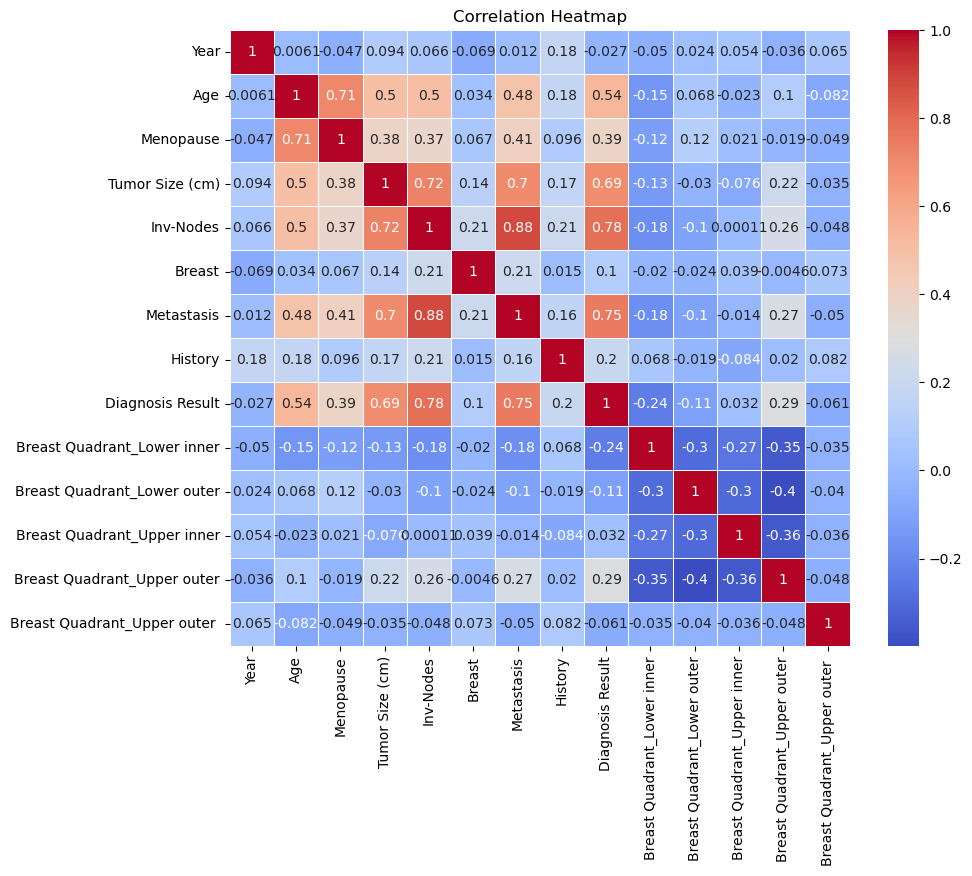

In [76]:
# Data Correlation Assessment

# Visualize the correlation between features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(bc_data_corr.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### Correlation assessment 
- Each square shows the correlation between the variables on each axis. 
Correlation values range from -1 to +1, with values closer to 1 indicating a high level of correlation
- The diagonals have a perfect correlation and show the same colour because the squares are correlating each variable to itself
- Positive correlation imply as one variable increases the other increases while a negative correlation implies
as one variable increases, the other decreases (inverse relationship)

- The closer a value is to 1, the more positively correlated they are. If it is closer to zero, it means there is no linear trend between the two variables

- The higher the number, the darker the colour, and consequently the higher the correlation between the variables which result in multicollinearity

- Multicollinearity is a problem as it undermines the significance of independent variables, and it is fixed by removing the highly correlated predictors from the model


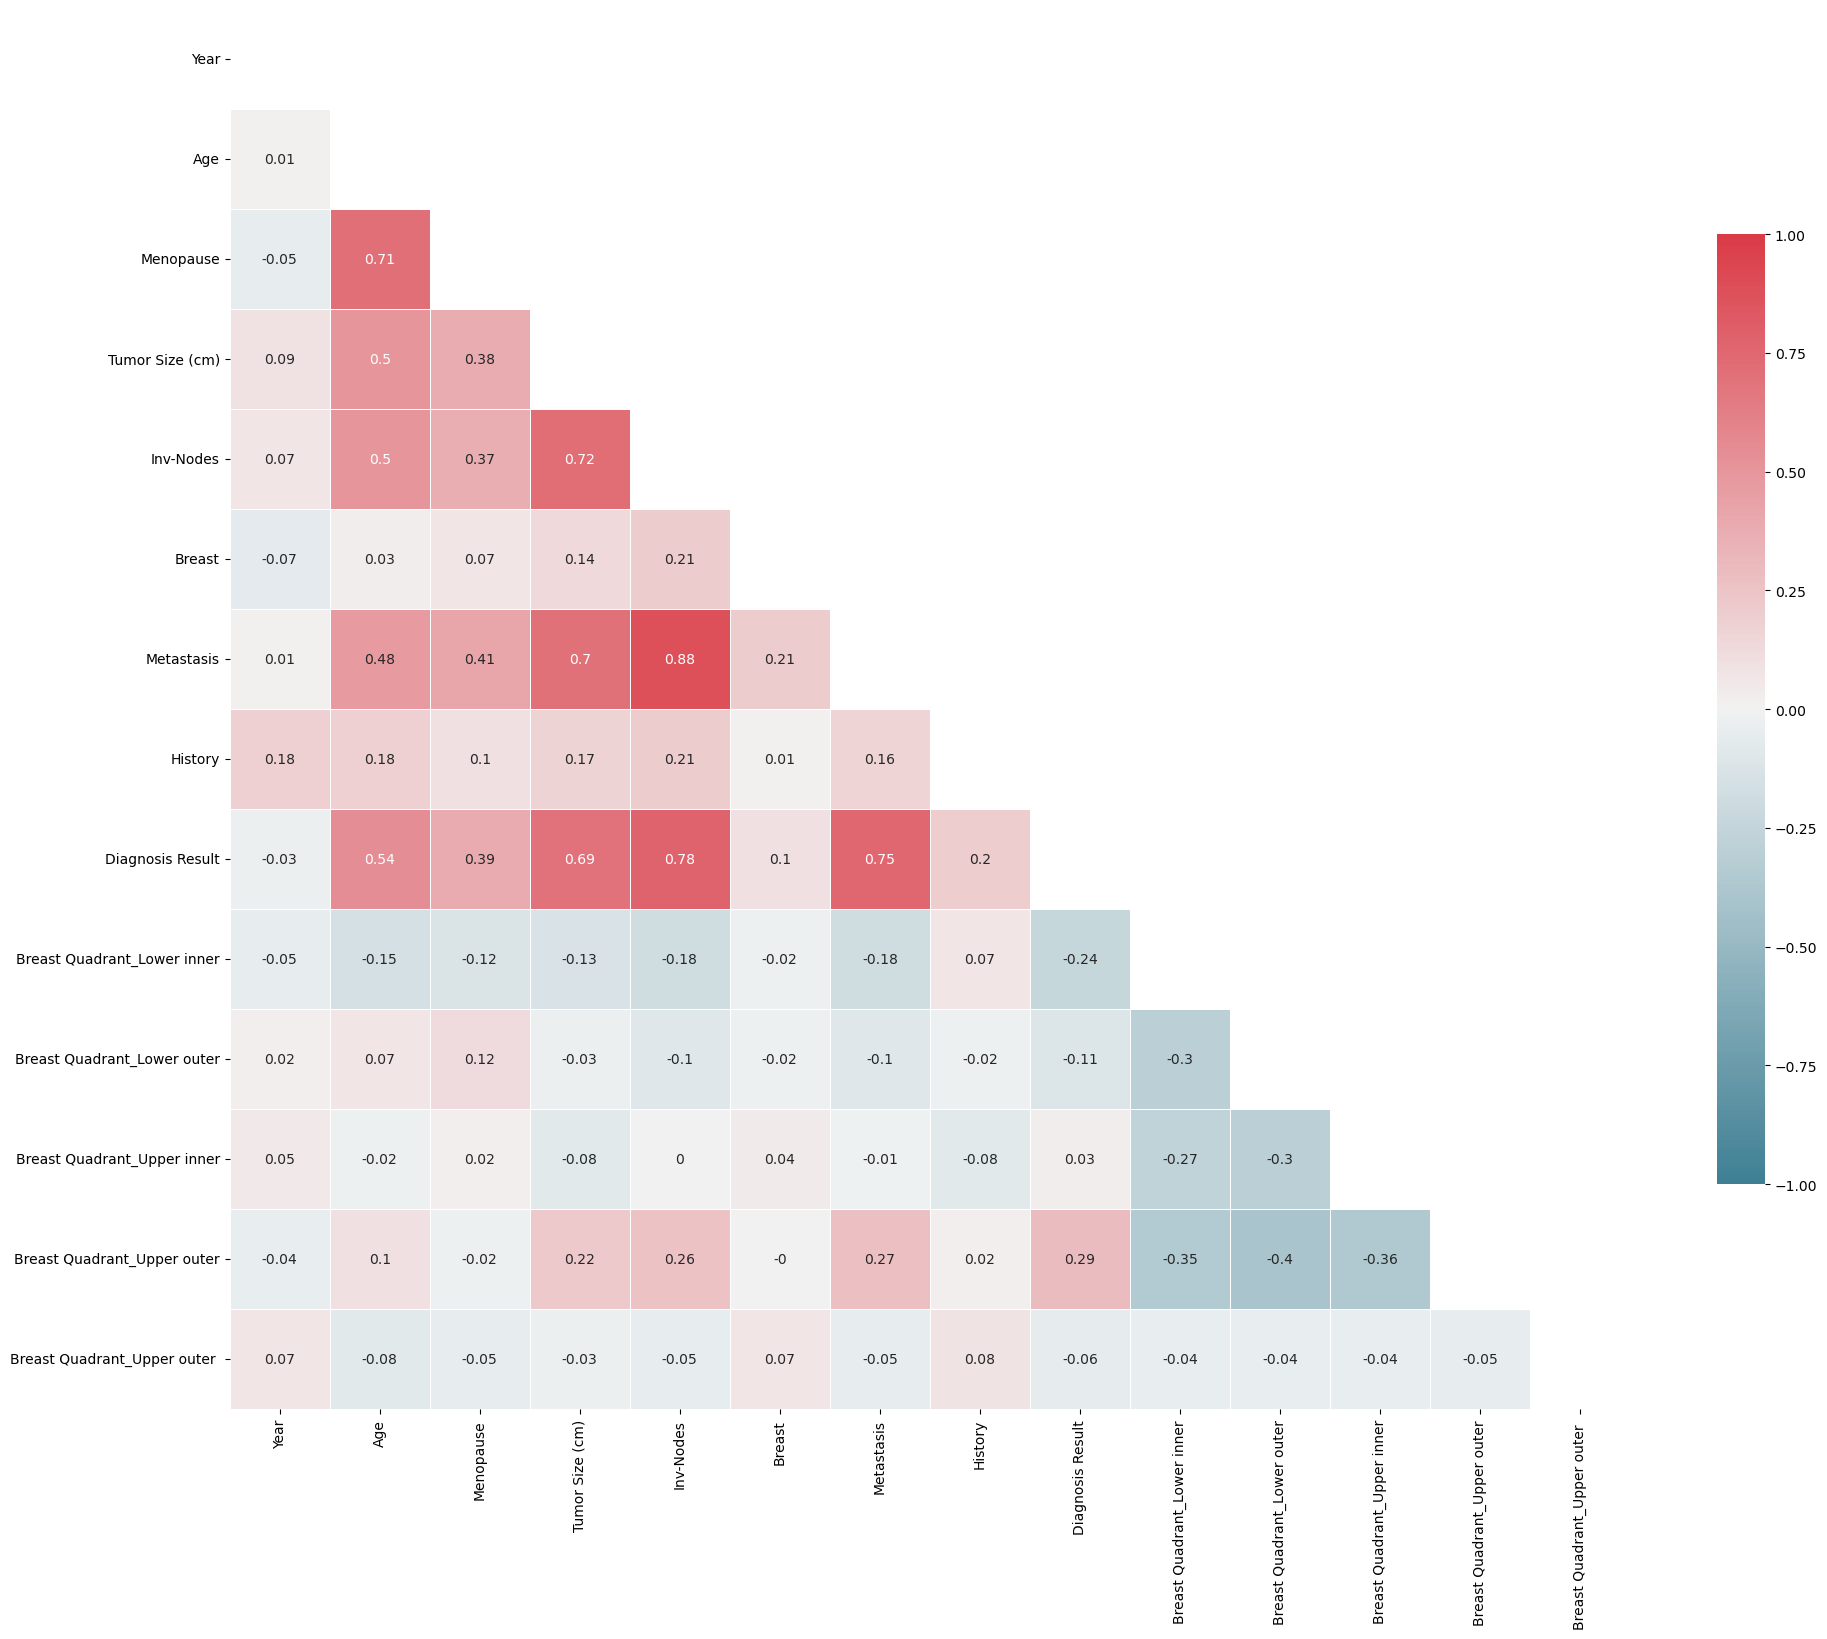

In [78]:
# Checking correlation of variables

# Generate and visualize the correlation matrix
corr = bc_data_corr.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20,20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
            
plt.tight_layout()


##### Correlation matrix inference
The correlation matrix indicates there is no multicollinearity between the independent variables

#### Dataset development for Building model using all independent features

In [81]:
# Define the independent and dependent variable in the dataset 
X = bc_data_corr.drop(['Diagnosis Result'], axis=1)   #feature matrix
y = bc_data_corr['Diagnosis Result']                 #target variable   
 
# Split dataset into training and testing set  
# Import library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [82]:
# View shape of train and test set
print("Shape of the X_train", X_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the y_test", y_test.shape)


Shape of the X_train (168, 13)
Shape of the X_test (43, 13)
Shape of the y_train (168,)
Shape of the y_test (43,)


#### Feature Scaling

In [84]:
# Normalization and standardization of numerical values to standardize features
# Standardize the features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
 
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


#### Model training and performance evaluation

In [86]:
# Import libraries for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Create function to determine model performance
def evaluating_model(y_test, y_pred):
    '''
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ",accuracy_score(y_test, y_pred))
    print("Precision Score:- ",precision_score(y_test, y_pred))
    print("Recall Score:- ",recall_score(y_test, y_pred))
    print("Confusion matrix:- \n",confusion_matrix(y_test, y_pred))
    

##### Logistic Regression Model

In [88]:
# import logistic regression module
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()   # create an object for the classifier

model1 = lr_clf.fit(X_train, y_train) 
y_pred = lr_clf.predict(X_test)

# Evaluate logistic regression model 
evaluating_model(y_test, y_pred)


Accuracy Score:-  0.9069767441860465
Precision Score:-  0.9411764705882353
Recall Score:-  0.8421052631578947
Confusion matrix:- 
 [[23  1]
 [ 3 16]]


##### Decision Tree Model

In [90]:
# import Decision tree module   
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()   # create an object for the classifier

model2 = dtc.fit(X_train, y_train)
y_pred = model2.predict(X_test)

# Evaluate decision tree model 
evaluating_model(y_test, y_pred)


Accuracy Score:-  0.8372093023255814
Precision Score:-  0.875
Recall Score:-  0.7368421052631579
Confusion matrix:- 
 [[22  2]
 [ 5 14]]


##### Random Forest Model

In [92]:
# Import Random forest module
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier() # create an object for the classifier

model3 =rfc.fit(X_train, y_train)
y_pred = model3.predict(X_test)

# Evaluate Random forest model 
evaluating_model(y_test, y_pred)


Accuracy Score:-  0.8837209302325582
Precision Score:-  1.0
Recall Score:-  0.7368421052631579
Confusion matrix:- 
 [[24  0]
 [ 5 14]]


##### K-Nearest Neighbours (KNN) model

In [94]:
# Import K-NearestNeighbours module
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=13
knn = KNeighborsClassifier(n_neighbors=13)

# Fit the model to the training data
model4 = knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model4.predict(X_test)

# Evaluate the accuracy of the model
evaluating_model(y_test, y_pred)


Accuracy Score:-  0.8604651162790697
Precision Score:-  1.0
Recall Score:-  0.6842105263157895
Confusion matrix:- 
 [[24  0]
 [ 6 13]]


##### Support Vector Machine (SVM) Model

In [96]:
# Import support vector machine library
from sklearn.svm import SVC

# Create an SVM object classifier and fit to training data
SVM = SVC(kernel='linear') 
model5 = SVM.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model5.predict(X_test)

# Evaluate the accuracy of the model
evaluating_model(y_test, y_pred)


Accuracy Score:-  0.8837209302325582
Precision Score:-  1.0
Recall Score:-  0.7368421052631579
Confusion matrix:- 
 [[24  0]
 [ 5 14]]


##### XGBoost Classifier Model

In [98]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Train the model using the training sets
model6 = xgb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model6.predict(X_test)

# Evaluate model performance 
evaluating_model(y_test, y_pred)


Accuracy Score:-  0.813953488372093
Precision Score:-  0.9230769230769231
Recall Score:-  0.631578947368421
Confusion matrix:- 
 [[23  1]
 [ 7 12]]


##### Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0)
model7 = gbdt.fit(X_train, y_train)

y_pred = model7.predict(X_test)
evaluating_model(y_test, y_pred)


Accuracy Score:-  0.9069767441860465
Precision Score:-  1.0
Recall Score:-  0.7894736842105263
Confusion matrix:- 
 [[24  0]
 [ 4 15]]


#### Comparative Analysis using major Clinically validated Breast Cancer Risk Factors ONLY to train machine learning model

In [103]:
# Create subset dataframe and train model on only core risk factors (age, history and menopause)
riskfactors_df = bc_data_corr[['Age', 'Menopause', 'History', 'Diagnosis Result']]

In [104]:
# View subset dataframe
riskfactors_df.head(10)

Age  Menopause  History  Diagnosis Result
0   40          0        0                 0
1   39          0        0                 0
2   45          1        0                 0
3   26          0        1                 0
4   21          0        1                 0
5   50          1        0                 1
6   58          1        0                 1
7   21          0        0                 0
8   35          0        0                 0
9   42          0        1                 0

In [105]:
# Define the independent and dependent variable in the dataset 
X2 = riskfactors_df.drop(['Diagnosis Result'], axis=1)   #feature matrix
y2 = riskfactors_df['Diagnosis Result']                 #target variable   
 
# Split dataset into training and testing set  
# Import library
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1)


In [106]:
# View shape of train and test set
print("Shape of the X2_train", X2_train.shape)
print("Shape of the X2_test", X2_test.shape)
print("Shape of the y2_train", y2_train.shape)
print("Shape of the y2_test", y2_test.shape)


Shape of the X2_train (168, 3)
Shape of the X2_test (43, 3)
Shape of the y2_train (168,)
Shape of the y2_test (43,)


#### Feature Scaling

In [108]:
# Normalization and standardization of numerical values to standardize features
# Standardize the features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
 
X2_train = ss.fit_transform(X2_train)
X2_test = ss.fit_transform(X2_test)


#### Model training and performance evaluation

In [110]:
# Import libraries for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Create function to determine model performance
def model_evaluation(y2_test, y2_pred):
    '''
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ",accuracy_score(y2_test, y2_pred))
    print("Precision Score:- ",precision_score(y2_test, y2_pred))
    print("Recall Score:- ",recall_score(y2_test, y2_pred))
    print("Confusion matrix:- \n",confusion_matrix(y2_test, y2_pred))
    

##### Logistic Regression Model

In [112]:
# import logistic regression module
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()   # create an object for the classifier

model10 = lr_clf.fit(X2_train, y2_train) 
y2_pred = lr_clf.predict(X2_test)

# Evaluate logistic regression model 
model_evaluation(y2_test, y2_pred)


Accuracy Score:-  0.7906976744186046
Precision Score:-  0.8125
Recall Score:-  0.6842105263157895
Confusion matrix:- 
 [[21  3]
 [ 6 13]]


##### Decision Tree Model

In [114]:
# import Decision tree module   
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()   # create an object for the classifier

model11 = dtc.fit(X2_train, y2_train)
y2_pred = model11.predict(X2_test)

# Evaluate decision tree model 
model_evaluation(y2_test, y2_pred)


Accuracy Score:-  0.627906976744186
Precision Score:-  0.5882352941176471
Recall Score:-  0.5263157894736842
Confusion matrix:- 
 [[17  7]
 [ 9 10]]


##### Random Forest Model

In [116]:
# Import Random forest module
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier() # create an object for the classifier

model12 =rfc.fit(X2_train, y2_train)
y2_pred = model12.predict(X2_test)

# Evaluate Random forest model 
model_evaluation(y2_test, y2_pred)


Accuracy Score:-  0.7209302325581395
Precision Score:-  0.6842105263157895
Recall Score:-  0.6842105263157895
Confusion matrix:- 
 [[18  6]
 [ 6 13]]


##### K-Nearest Neighbours (KNN) model

In [118]:
# Import K-NearestNeighbours module
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=13
knn = KNeighborsClassifier(n_neighbors=13)

# Fit the model to the training data
model13 = knn.fit(X2_train, y2_train)

# Make predictions on the testing data
y2_pred = model13.predict(X2_test)

# Evaluate the accuracy of the model
model_evaluation(y2_test, y2_pred)


Accuracy Score:-  0.813953488372093
Precision Score:-  0.7894736842105263
Recall Score:-  0.7894736842105263
Confusion matrix:- 
 [[20  4]
 [ 4 15]]


##### Support Vector Machine (SVM) Model

In [120]:
# Import support vector machine library
from sklearn.svm import SVC

# Create an SVM object classifier and fit to training data
SVM = SVC(kernel='linear')   
model14 = SVM.fit(X2_train, y2_train)

# Make predictions on the testing set
y2_pred = model14.predict(X2_test)

# Evaluate the accuracy of the model
model_evaluation(y2_test, y2_pred)


Accuracy Score:-  0.6976744186046512
Precision Score:-  0.75
Recall Score:-  0.47368421052631576
Confusion matrix:- 
 [[21  3]
 [10  9]]


##### XGBoost Classifier Model

In [122]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Train the model using the training sets
model15 = xgb.fit(X2_train, y2_train)

# Make predictions on the testing set
y2_pred = model15.predict(X2_test)

# Evaluate model performance 
model_evaluation(y2_test, y2_pred)


Accuracy Score:-  0.7441860465116279
Precision Score:-  0.8333333333333334
Recall Score:-  0.5263157894736842
Confusion matrix:- 
 [[22  2]
 [ 9 10]]


##### Gradient Boosting Classifier

In [124]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0)
model16 = gbdt.fit(X2_train, y2_train)

y2_pred = model16.predict(X2_test)
model_evaluation(y2_test, y2_pred)


Accuracy Score:-  0.7674418604651163
Precision Score:-  0.6956521739130435
Recall Score:-  0.8421052631578947
Confusion matrix:- 
 [[17  7]
 [ 3 16]]


#### Deploying trained Machine Learning Models to make Breast Cancer incidence Predictions

##### Target variable labels
- 0 indicates Diagnostic result: Benign
- 1 indicates Diagnostic result: Malignant


In [127]:
# Sample prediction with model trained using Gradient Boosting classifier algorithm
# with age of 15years and confirmed premenopausal status
model7.predict([[2019, 15,	0,	0,	0,	1,	0,	0,	0.0, 0.0, 1.0, 0.0,	0.0 ]])

# Inference:
# 0: Benign
# 1: Malignant

array([0], dtype=int64)

In [128]:
# Sample prediction with model trained using Gradient Boosting classifier algorithm
# with age 70years and confirmed postmenopausal status
model7.predict([[2019, 70, 1, 2, 0, 1, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0]])

# Inference:
# 0: Benign
# 1: Malignant

array([1], dtype=int64)

In [129]:
# Sample prediction with model trained using LogisticRegression classifier algorithm
# with age of 15years and confirmed premenopausal status
model1.predict([[2019, 15,	0,	0,	0,	1,	0,	0,	0.0, 0.0, 1.0, 0.0,	0.0 ]])

# Inference:
# 0: Benign
# 1: Malignant

array([0], dtype=int64)

In [130]:
# Sample prediction with model trained using LogisticRegression classifier algorithm
# with age of 70years and confirmed postmenopausal status
model1.predict([[2019, 70,	1,	0,	0,	1,	0,	0,	0.0, 0.0, 1.0, 0.0,	0.0 ]])

# Inference:
# 0: Benign
# 1: Malignant

array([0], dtype=int64)

#### Discussion
Breast cancer is a major global menace responsible for death of millions of women yearly. Studies have revealed that certain risk factors are majorly implicated in the pathogenesis of breast cancer. Amongst these key risk factors are age, menopausal status and history which are features present in this project and adopted as case study for analysis.  

The first steps of the project involved data import, exploration and cleaning. After successfully importing the dataset into a pandas dataframe, the data exploration revealed presence of incorrect entries and wrong datatypes across multiple columns respectively. The data cleaning exercise corrected these errors and ensured also that there were no missing values, duplicate values, standardization errors and irrelevant data were dropped. 

On completion of the data cleaning exercise, exploratory data analysis was carried out with focus on establishing the relationship between breast cancer risk factors (age, menopause and history) and the diagnostic result. 
- The statistical information revealed that women between the age range of 13 to 77 years underwent the breast cancer examination and the mean age of women reported was 39.8 years. Boxplot visualization further revealed that diagnosis result of benign cases were recorded in women from the age 13 years to about 70 years, however, significant spread of data with benign cases was observed within age range 22 to 42 years. In contrast, the malignant cases recorded from the breast cancer examination conducted was observed in women between ages 25 and 77 years old with the malignant cases predominantly observed within 42 and 56 year old women. This findings reveal a notable difference in age distribution and diagnosis result that imply a age-related disparity, suggesting that women diagnosed with breast cancer at a younger age are more likely to have benign tumors, whereas older women are at a higher risk of developing malignant tumors.


- Also, the history record for women screened for breast cancer revealed 58.77% had no previous history of breast cancer. For this group of women, the diagnosis result had 80 outcomes of benign cases and 43 malignant cases. By comparison, women who had previous history of breast cancer had higher cases of malignancy compared to benign cases. This suggests that prior history of breast cancer increases susceptibility to developing breast cancer and can be a crucial risk assessment profile in breast cancer treatment guidelines. In addition, the significant disparity in the number of benign and malignant cases for women who had no history of breast cancer could also have been boosted as a result of the relative lower age range which the age data is skewed to by having a mean age of 39.8 years. As discussed earlier, younger women are less prone to breast cancer compared to older women and this factor alongside the no-history status could simultaneously play a contributory role towards the elevated number of benign cases observed.


- Lastly on the EDA, the relationship between menopausal status of the women and the diagnostic outcome indicated that premenopausal women had a remarkably high record of benign cases observed compared to malignant cases while postmenopausal women had appreciably elevated cases of breast cancer malignancy as opposed to benign cases. This findings also align with scientifically validated report by [6] which suggest the roles these risk factors play in breast cancer carcinogenesis.

After data cleaning and exploratory data analysis, the data preprocessing was carried out by encoding the categorical variables (features and target variable) to numerical value for machine learning suitability and correlation assessment executed to check for multicollinearity. The data was further splitted into train and test set, feature scaling was carried out to normalize the range of features in the dataset and model built using 7 machine learning algorithms. The model was fitted, predictions made on the test set and accuracy of the model was evaluated.

Furthermore, a comparative analysis was done using all 9 independent features in the breast cancer dataset to train model with the aim of comparing model performance against models trained using only the 3 key risk factors (age, menopause and history). The finding from this comparative analysis revealed a better accuracy score when all 9 independent features were adopted to train model. This suggests that an efficient approach to build models with capacity for better-precision making of breast cancer incidence and early detection, is to have as much valid and quality independent features to train the data.

Logistic regression and Gradient Boosting classifier model produced the highest accuracy, precision and recall scores and were adopted for predictive analytics. The models were testrun successfully by inputing sample variables in the model for breast cancer prediction analysis. The models were saved using joblib module from scikit learn and can easily be loaded, deployed or integrated into electronic health record of healthcare organizations for predictive analytics. 

I hope this project advances the frontiers of knowledge in the development of machine learning models that foster breast cancer preventive therapeutic strategies and contributes to early detection which is crucial to effective treatment.


#### Recommendation


Treatment guidelines developed to mitigate breast cancer carcinogenesis are typically established on data factoring patient demographic, disease presentation, population genetic disposition and the environmental influencing factors to create evidence-based treatment guidelines that ensure efficient clinical decision making and appropriate therapeutic intervention. Currently, the treatment guidelines practised in Sub-Saharan Africa (Nigeria inclusive) are adapted from developed nations, despite the genetic differences among populations, diet and different environmental influencing factors which are major players in the initiation of breast cancer carcinogenesis.

Despite efforts, breast cancer research in Nigeria still lacks robust evidence to fully support Evidence-Based Medicine (EBM). The limited availability of data hinders the implementation of EBM in the country. To address this, there is a need for comprehensive healthcare research, including randomized controlled trials, meta-analyses, and systematic reviews, which produce high-quality evidence. This would enhance clinical decision-making and inform the development of evidence-based treatment guidelines tailored to the unique needs of the Sub-Saharan population, including genetic predispositions and environmental risk factors contributing to breast cancer incidence in Nigeria. Furthermore, the digitization of patient data, including the adoption of electronic medical records (EMRs) is strongly recommended because it is crucial to building a robust database that enables data-driven strategies and supports the implementation of evidence-based decision-making in healthcare.



As mentioned earlier, the dataset adopted for this project was not most-suited, however was beneficial as it contained key features (age, menopause and history) implicated in breast cancer. The comparative analysis show that adopting only the 3 key risk factors as independent features produced a model with poor performance compared to model trained with all 9 independent features.This highlights the need to carry out investigations that identify risk factors particularly tailored to Sub-Saharan Africa's unique population characteristics and risk factors, considering its own trends, patterns to foster development of models with efficiency for personalized care.


In addition, the risk factors (age, history and menopause) highlighted are influenced by natural causes and several preventive measures as well as screening programs are crucial to ensure possible minimization of breast cancer incidence rate and the implementation of early treatment. As observed from the exploratory data analysis, the older a woman gets the greater the risk of breast cancer, just as menopause sets in over the years, which also increases the risk of breast cancer. The following measures are recommended to manage this risk factors: Regular breast self-examinations, clinical breast exams, mammograms, genetic testing particulary for women with family history of breast cancer incidence. Also, adopting lifestyle interventions that contribute to attenuating mechanisms that promote breast cancer carcinogenesis such as: maintaining healthy weight, regular exercise, limiting alcohol intake, no smoking and rich diet are recommended to help curb the prevalence of breast cancer in Sub-Saharan Africa.


#### Acknowledgement
Thank you for your time and effort to review this project. Thank you!

#### References

1. Sedeta, E.T., Jobre, B., & Avezbakiyev, B. (2023). Breast cancer: Global patterns of incidence, mortality, and trends.
Journal of Clinical Oncology, 41, 16
https://doi.org/10.1200/JCO.2023.41.16_suppl.10528 


2. Fatiregun, O.A., Oluokun, T., Lasebikan, N.N., Nwachukwu, E., Ibraheem, A.A., & Olopade, O. (2021).
Breast Cancer Research to Support Evidence-Based Medicine in Nigeria: A Review of the Literature, JCO Global Oncology,
Volume 7 
https://doi.org/10.1200/GO.20.00541 

3. World Health Organization. Breast cancer. Geneva WHO; 2020. Available: https://www.who.int/news-room/fact-sheets/detail/breast-cancer 

4. Globacan, 2018. Nigeria Cancer Fact Sheet. https://gco.iarc.fr/today/data/factsheets/populations/566-nigeria-fact-sheets.

5. Aghajanzadeh, M., Torabi, H., Najafi, B., Talebi, P., & Shirini, K. (2023). Intermammary breast cancer: A rare case of cancer with origin of breast cells in an unusual location. SAGE open medical case reports, 11, 2050313X231154996. https://doi.org/10.1177/2050313X231154996

6. Łukasiewicz, S., Czeczelewski, M., Forma, A., Baj, J., Sitarz, R., & Stanisławek, A. (2021). Breast Cancer-Epidemiology, Risk Factors, Classification, Prognostic Markers, and Current Treatment Strategies-An Updated Review. Cancers, 13(17), 4287. https://doi.org/10.3390/cancers13174287 

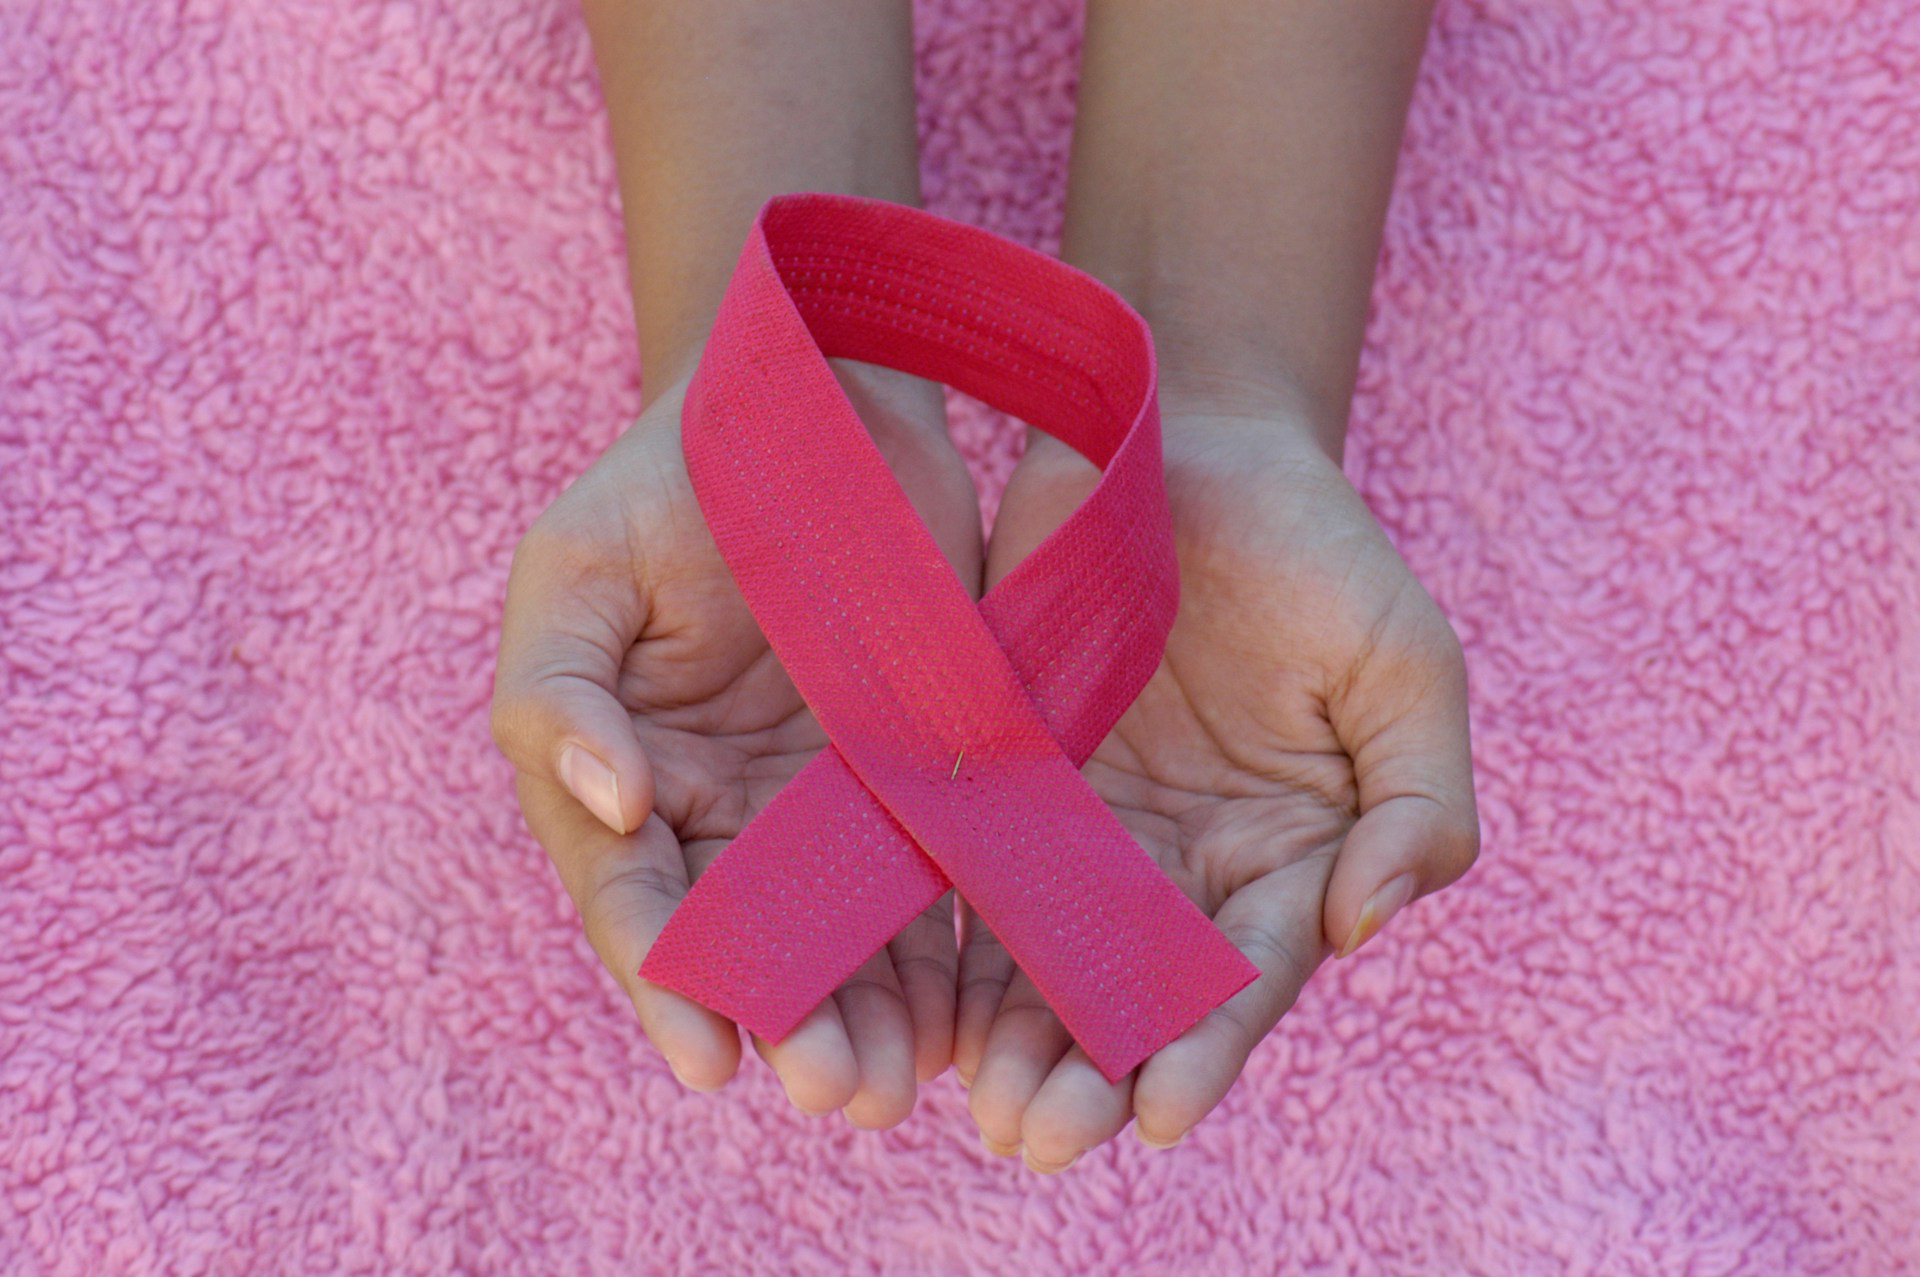

In [137]:
from PIL import Image
img = Image.open('breast cancer awareness.jpg')
img

# Picture credit to Angiola Harry, Unsplash